In [144]:
# Data needs to be cleaned more, this model can be used as a sample test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers

In [154]:
df = pd.read_csv("cleaned_data.csv")

In [156]:
dropped = ['price']
X = df.drop(dropped, axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [162]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[20:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.0009
Validation MSE: 0.0009

Training r2: 0.4089
Validation r2: 0.1867


In [163]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
host_total_listings_count,0.026945
number_of_reviews,0.027559
average_review,0.028987
beds,0.031189
host_is_superhost,0.042978
accommodates,0.044751
bedrooms,0.062754
bathrooms,0.064116
amenities,0.114739
minimum_nights,0.275895


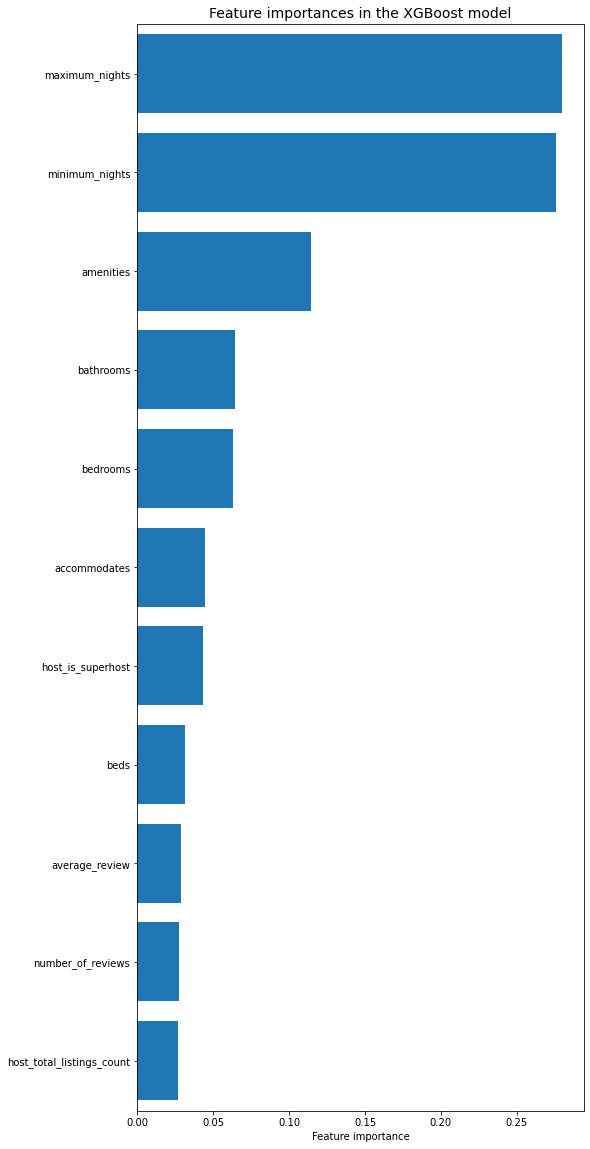

In [164]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [151]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 100,481
Trainable params: 100,481
Non-trainable params: 0
_________________________________________________________________
None


In [152]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7/100
19/19 [==============

In [153]:
trained_prediction = nn2.predict(X_train)
test_prediction = nn2.predict(X_test)
print("Training MSE:", round(mean_squared_error(y_train, trained_prediction),4))
print("Validation MSE:", round(mean_squared_error(y_test, test_prediction),4))
print("\nTraining r2:", round(r2_score(y_train, trained_prediction),4))
print("Validation r2:", round(r2_score(y_test, test_prediction),4))

Training MSE: 0.0012
Validation MSE: 0.001

Training r2: 0.1999
Validation r2: 0.043
